In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Description of dataset: 
- Age 
- Sex
- cp : chest pain type (CATEGORICAL)
      -- Value 1: typical angina
      -- Value 2: atypical angina
      -- Value 3: non-anginal pain
      -- Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results
      -- Value 0: normal
      -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exng: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
      -- Value 1: upsloping
      -- Value 2: flat
      -- Value 3: downsloping
- caa: number of major vessels (0-3) colored by flouroscopy
- thall: 3 = normal; 6 = fixed defect; 7 = reversable defect
- output 


In [ ]:
df.shape

(303, 14)

## Null value detection

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


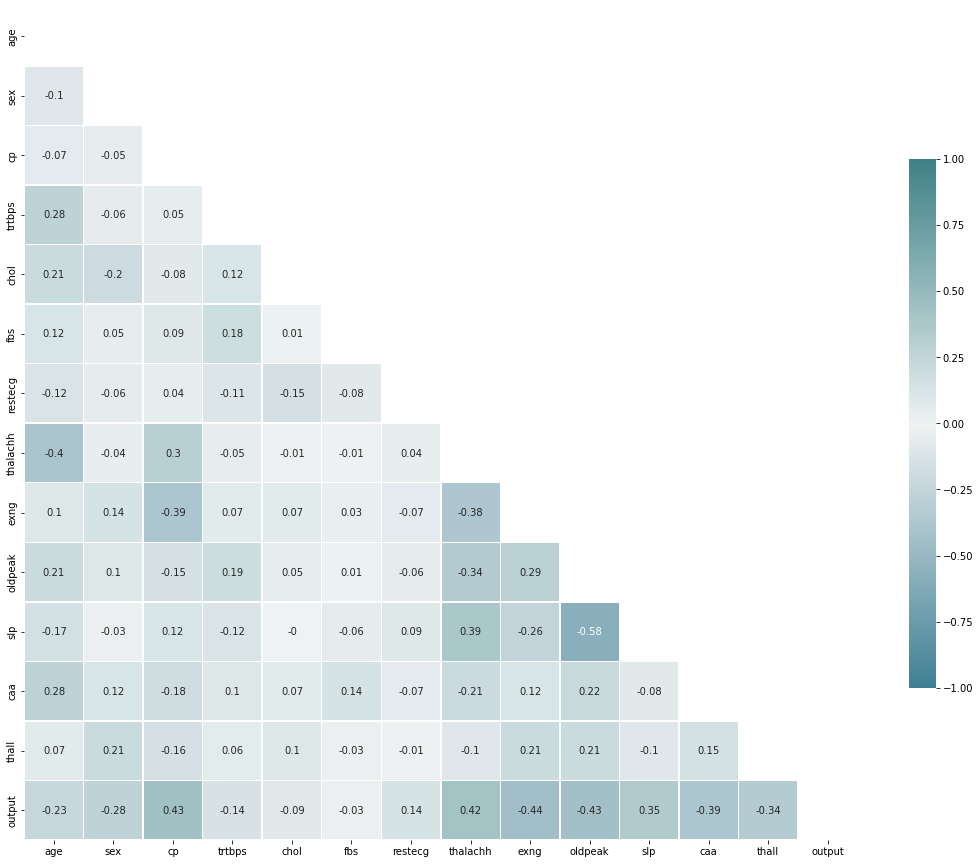

In [ ]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

## Primary Statistical Findings

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Engineering and EDA

## Change column names

In [ ]:
df.rename(columns = {'cp':'Chest Pain','trtbps':'rest BP','chol':'cholestrol','fbs':'fasting blood sugar','thalachh':'max heart rate','exng':'exercise angina','slp':'slope','caa':'Major vessels'},inplace=True)

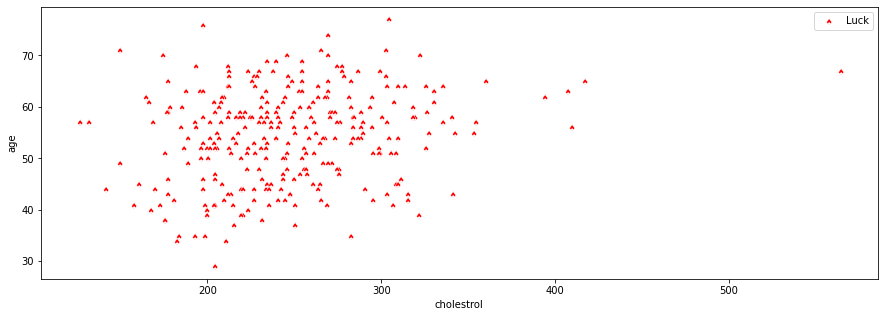

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.scatterplot('cholestrol','age',data=df, alpha=1,color = 'red',marker=r'$\spadesuit$',label="Luck")
plt.show()

## Check Count data in every feature

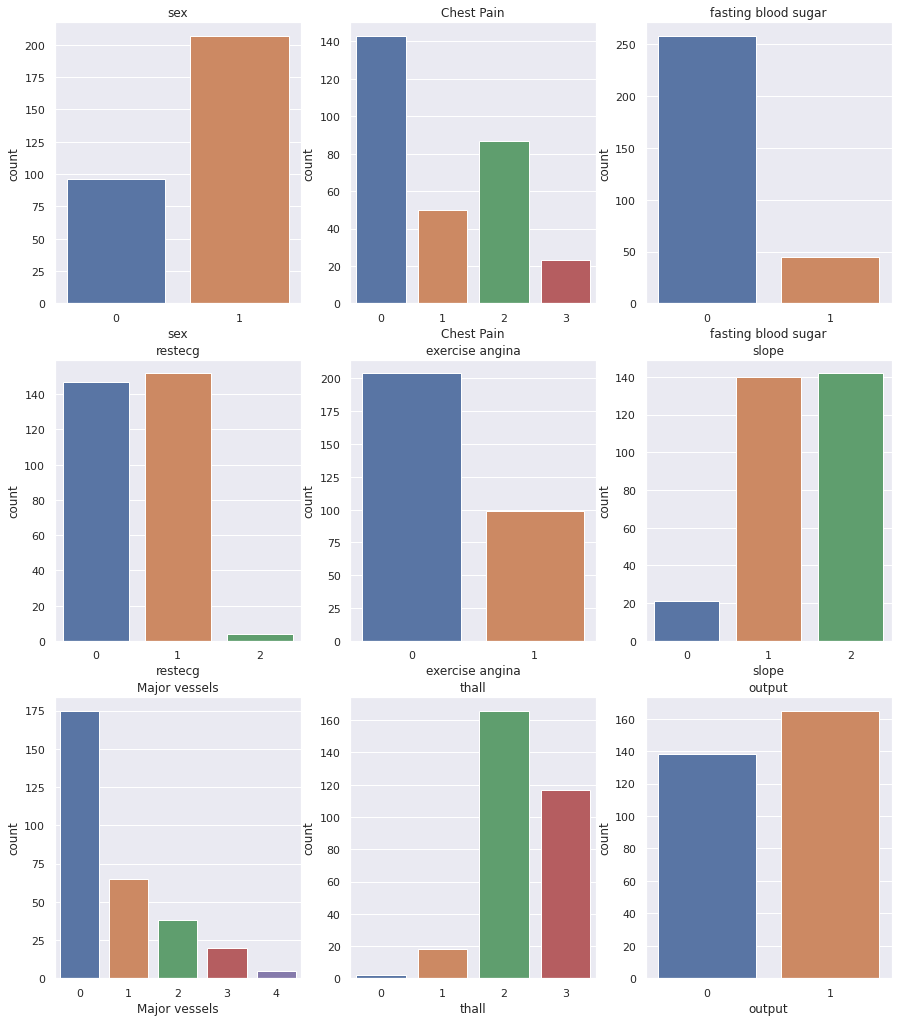

In [ ]:
df1 = df[['sex', 'Chest Pain','fasting blood sugar', 'restecg', 'exercise angina', 'slope', 'Major vessels', 'thall', 'output']]
fig1 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

**Observations**:
- Male count is higher than female count by 100%
- fasting blood sugar is not so significant to determine the output as there is a huge difference between common and uncommon case.
- upsloping and downsloping count is higher than normal count

## Check the count of every feature with respect to output to understand the difference. 

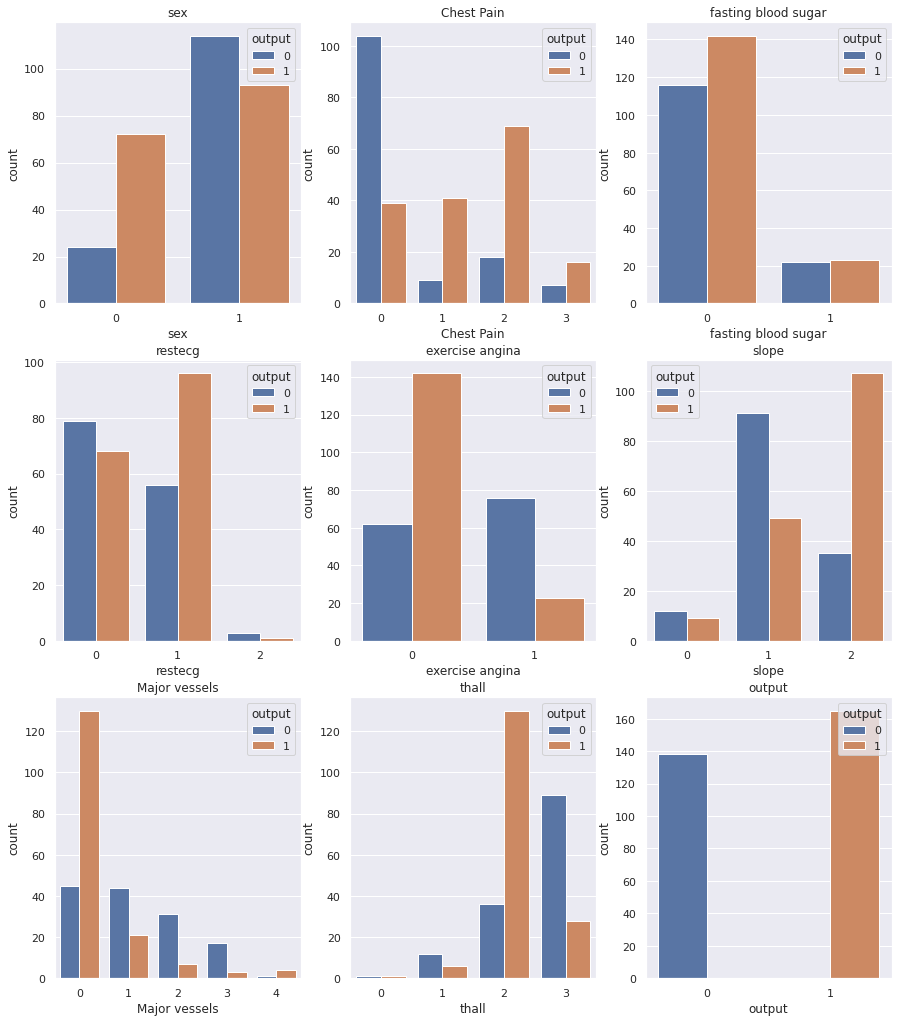

In [ ]:
fig3 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1,hue='output').set(title='{}'.format(i[1]))
plt.show()

**Observations**:
- Heart stroke happening count is high in females than males
- Blocking of major vessels is high during heart attack and its evident from here.

## Outlier detection
- To analyse Outlier detection lets plot **boxplot** and using Interquartile range lets remove them.

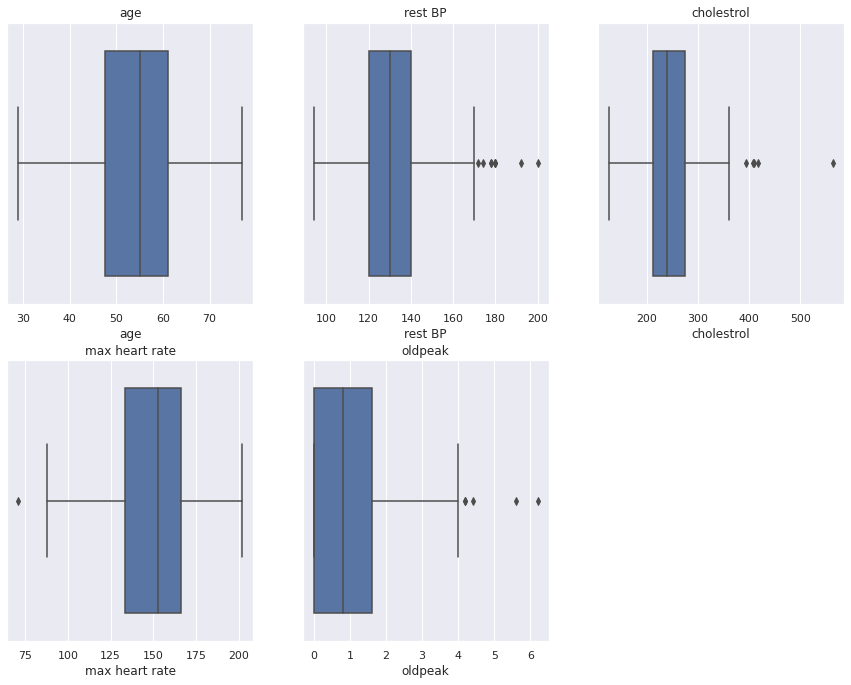

In [ ]:
df2 = df[['age','rest BP', 'cholestrol','max heart rate','oldpeak']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df2).set(title='{}'.format(i[1]))
plt.show()

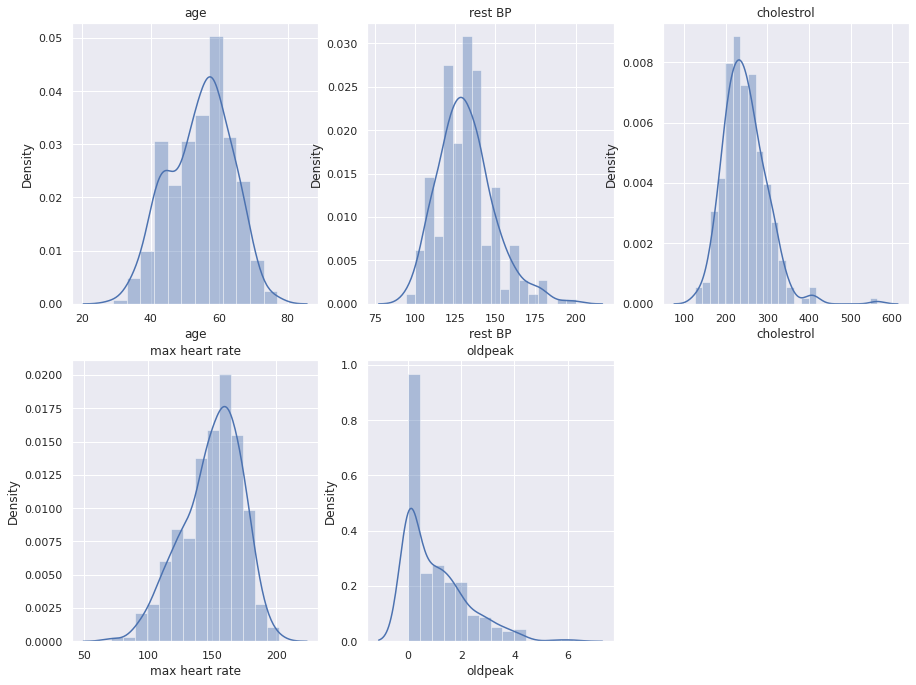

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df2[i[1]]).set(title='{}'.format(i[1]))
plt.show()

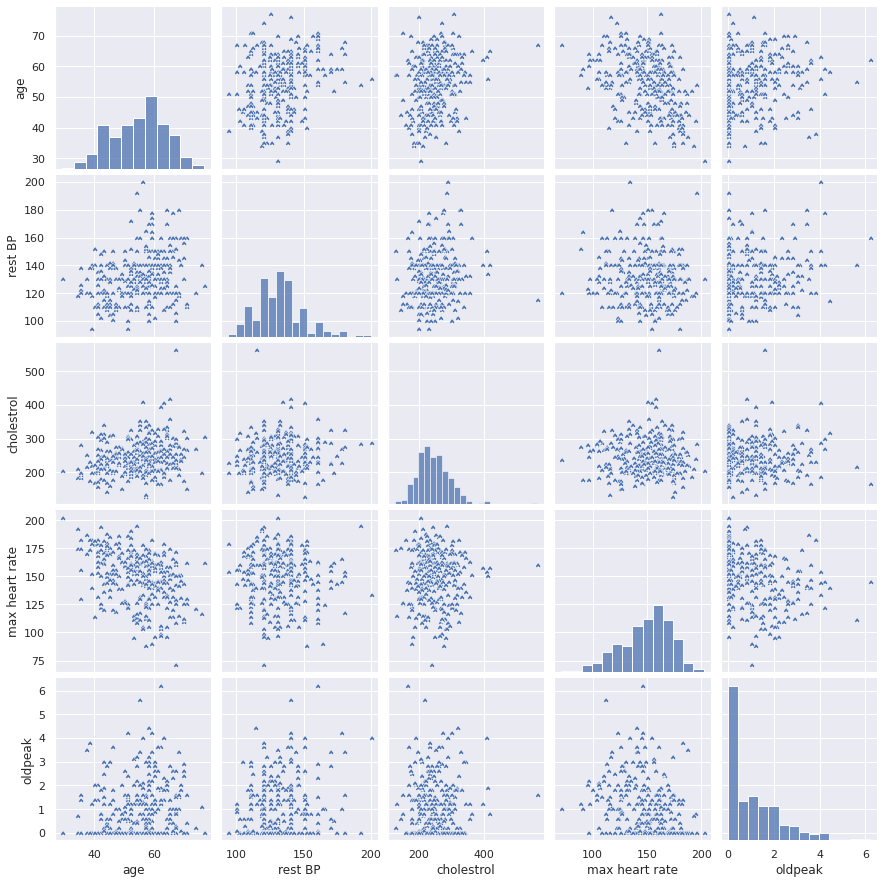

In [ ]:
sns.pairplot(data=df2,palette='reds',markers=r'$\spadesuit$')
plt.show()

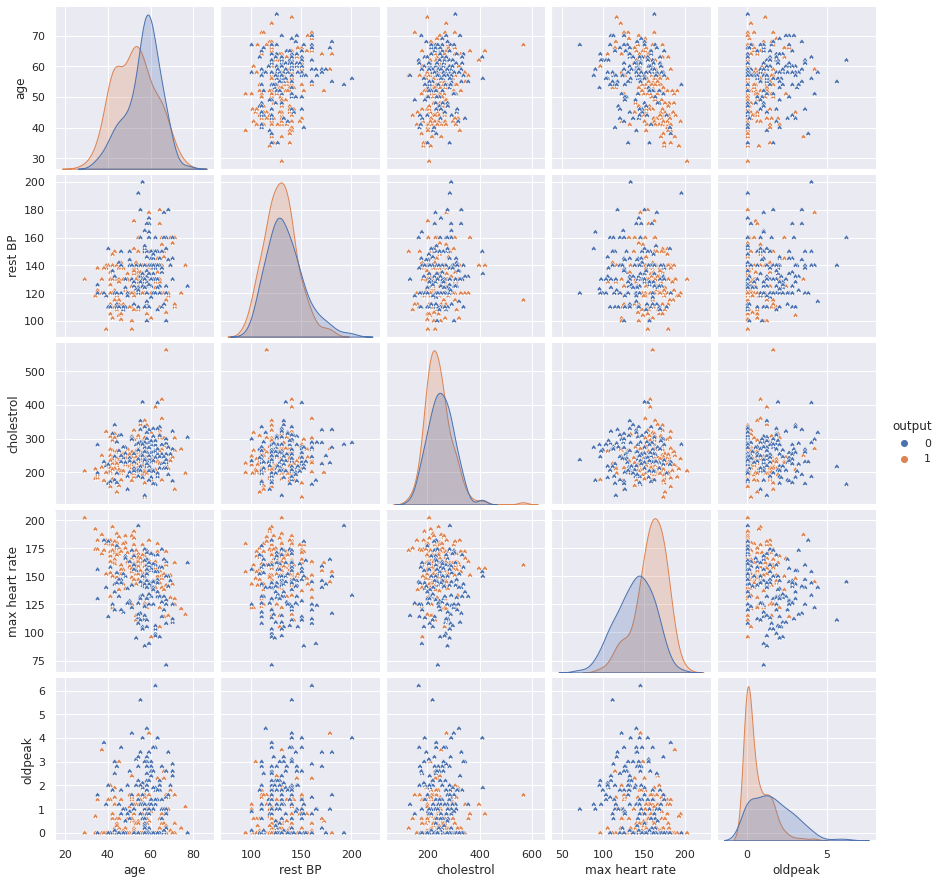

In [ ]:
df3 = df[['age','rest BP', 'cholestrol','max heart rate','oldpeak','output']]
sns.pairplot(data=df3,hue='output',markers=r'$\spadesuit$')
plt.show()

From both the above plots, we can observe collinearity. 
For example, age and cholestrol.

### It's time to remove Outliers!!!
- It is evident from the above plot that we have one outlier in oldpeak and one outlier in cholestrol. Let's remove them!!

In [ ]:
df[df['oldpeak']>=5]

,age,sex,Chest Pain,rest BP,cholestrol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,Major vessels,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [ ]:
df[df['cholestrol']>500]

,age,sex,Chest Pain,rest BP,cholestrol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,Major vessels,thall,output
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [ ]:
df.drop([204,221,85],inplace=True)

In [ ]:
df.shape

(300, 14)

### Grouping a few features and analyse them

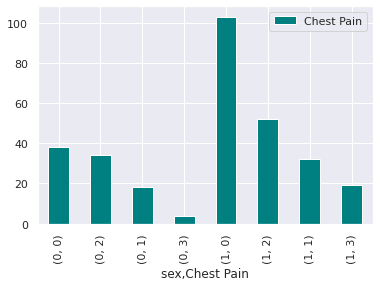

In [ ]:
df.groupby(['sex'])['Chest Pain'].value_counts().plot(kind='bar',color='teal')
plt.legend()
plt.show()

- Chest Pain in females vs Males is evident with former higher with nearly 40%
- Asymptotic pains are very few when comapred with the risky ones

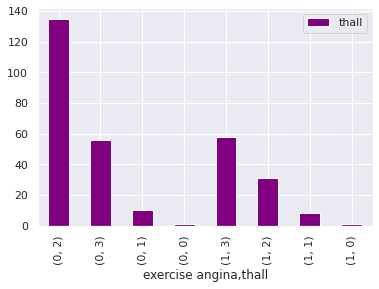

In [ ]:
df.groupby(['exercise angina'])['thall'].value_counts().plot(kind='bar',color='purple')
plt.legend()
plt.show()

- Blockage of blood vessels has not shown any significant relation with symptoms of exercise attacks.

# Feature Selection

## Select K Best Features

### Using chi2 function

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2         #feature selection package is selected and selectkbest is imported to choose the best features
x =df.iloc[:,:-1]                                                                       #Rows from school_closing to facial_coverings
y =df.iloc[:,-1]                                                                            #y on confirmed cases
bestfeatures = SelectKBest(score_func=chi2,k=10)               #best features are given using selectkbest function, where test is chi_square function. k is degrees of freedom
fit = bestfeatures.fit(x,y)                                                           #degrees of freedom is taken as categories-1
dfscores  =pd.DataFrame(fit.scores_)                                     #the data is fit using fit function and the scores and columns are assigned respectively
dfcolumns = pd.DataFrame(x.columns)                         
featureScores = pd.concat([dfcolumns,dfscores],axis=1)      #concatenating both the columns to a dataframe
featureScores.columns = ['Specs', 'Score']                           #giving them column names. 

featureScores.nlargest(14,'Score')

,Specs,Score
7,max heart rate,182.870422
9,oldpeak,66.073301
11,Major vessels,64.811986
2,Chest Pain,60.256120
4,cholestrol,41.510897
8,exercise angina,38.487461
0,age,23.752911
3,rest BP,12.906241
10,slope,9.025932
1,sex,7.535210


### Using f_classif function

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif         #feature selection package is selected and selectkbest is imported to choose the best features
x =df.iloc[:,:-1]                                                                       #Rows from school_closing to facial_coverings
y =df.iloc[:,-1]                                                                            #y on confirmed cases
bestfeatures = SelectKBest(score_func=f_classif,k=10)               #best features are given using selectkbest function, where test is chi_square function. k is degrees of freedom
fit = bestfeatures.fit(x,y)                                                           #degrees of freedom is taken as categories-1
dfscores  =pd.DataFrame(fit.scores_)                                     #the data is fit using fit function and the scores and columns are assigned respectively
dfcolumns = pd.DataFrame(x.columns)                         
featureScores = pd.concat([dfcolumns,dfscores],axis=1)      #concatenating both the columns to a dataframe
featureScores.columns = ['Specs', 'Score']                           #giving them column names. 

featureScores.nlargest(14,'Score')

,Specs,Score
8,exercise angina,70.143020
9,oldpeak,67.650258
2,Chest Pain,66.918431
7,max heart rate,63.053183
11,Major vessels,53.468025
12,thall,39.802983
10,slope,38.761067
1,sex,25.970022
0,age,16.423808
6,restecg,6.069143


## Forward feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import f1_score
def evaluate_metric(model, x_cv, y_cv):
    return f1_score(y_cv, model.predict(x_cv), average='micro')

In [ ]:
def forward_feature_selection(model,x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = []  
        model = model 
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True)
        feature_set.append(metric_list[0][1])
    return feature_set

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
forward_feature_selection(lr,X_train,X_test,y_train,y_test,10)

['Chest Pain',
 'cholestrol',
 'fasting blood sugar',
 'oldpeak',
 'thall',
 'age',
 'rest BP',
 'exercise angina',
 'slope',
 'Major vessels']

## Recursive Feature Elimination with Cross Validation

### Train test split

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=lr, step=1, min_features_to_select=8,cv=4,verbose=1,n_jobs=-1)
rfecv.fit(X,y)
rfecv.transform(X)
print(); print(rfecv)
print(); print('Optimal no of features: {}'.format(rfecv.n_features_))
print(); print(np.where(rfecv.support_==False)[0])

Fitting estimator with 13 features.

RFECV(cv=4, estimator=LogisticRegression(), min_features_to_select=8, n_jobs=-1,
      verbose=1)

Optimal no of features: 12

[4]


In [ ]:
df.drop('fasting blood sugar',axis=1,inplace=True)

In [ ]:
df.shape

(300, 13)

# Statistical Findings

In [ ]:
def central_tendency(df,col_list):                                            #defining a function to find mean, median and mode to all the columns 
        mean_col, median_col,mode_col = [],[],[]                        #taking three empty columns to add the data
        percentile_90,percentile_95 = [],[]                                    #90%, 95% percentile values
        upper_limit,lower_limit,zscore = [],[],[]                              #Using the 99.97% shuffle to remove outliers
        for col in col_list:                                                             # for loop for processing the data
            ser = df[col]                                                                  #adding column by column to a reference
            mean_col.append(ser.mean())                                      #calculating mean and adding that to mean column
            median_col.append(ser.median())                                #calculating median and adding that to median column
            mode_col.append(ser.mode())                                     ##calculating mode and adding that to mode column
            upper_limit.append(ser.mean() + 3*ser.std())               #calculating upper limit for 3 times the std deviation for each column
            lower_limit.append(ser.mean() - 3*ser.std())                #calculating upper limit for 3 times the std deviation for each column
            percentile_90.append(np.percentile(ser,90))                #percentile 90% for all columns
            percentile_95.append(np.percentile(ser,95))                #percentile 95% for all columns
    
        return mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 #return the columns to use it in the next function to plot the data
    
col_list = df.columns                                                                #accessing list of columns
mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 = central_tendency(df,col_list) 
df_stats = pd.DataFrame({'columns':col_list,'mean':mean_col,'median':median_col,'upper limit':upper_limit,'lower limit':lower_limit,'90 percentile':percentile_90,'95 percentile':percentile_95})                 #calling the central tendency function
df_stats

,columns,mean,median,upper limit,lower limit,90 percentile,95 percentile
0,age,54.296667,55.00,81.558274,27.035060,66.00,68.00
1,sex,0.686667,1.00,2.080538,-0.707204,1.00,1.00
2,Chest Pain,0.970000,1.00,4.067399,-2.127399,2.00,3.00
3,rest BP,131.556667,130.00,184.105174,79.008160,152.00,160.20
4,cholestrol,245.576667,240.50,390.999739,100.153594,308.10,326.05
5,restecg,0.530000,1.00,2.108037,-1.048037,1.00,1.00
6,max heart rate,149.756667,153.00,218.460751,81.052582,177.10,182.00
7,exercise angina,0.326667,0.00,1.736000,-1.082667,1.00,1.00
8,oldpeak,1.005333,0.75,4.292729,-2.282062,2.62,3.21
9,slope,1.410000,1.00,3.234334,-0.414334,2.00,2.00


## A few questions based on Inferential Stats

### Is the cholestrol content high in girls than boys?
### Does high cholestrol people have high max heart rate?
### Is exercise angina is high in high aged people relatively?
Let's get some conclusions for these!!! 

Consider alpha value=0.05 

- **For the first question above**, <br>
             Null Hypothesis: The mean cholestrol doesn't differ by gender. <br>
             Alternate Hypothesis: The mean cholestrol differs by gender.

In [ ]:
import scipy.stats
scipy.stats.ttest_ind(df[df['sex']==1]['cholestrol'],df[df['sex']==0]['cholestrol'])

Ttest_indResult(statistic=-3.3226189011072624, pvalue=0.0010029561854722206)

In [ ]:
value = scipy.stats.ttest_ind(df[df['sex']==1]['cholestrol'],df[df['sex']==0]['cholestrol'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Ttest_indResult(statistic=-3.3226189011072624, pvalue=0.0010029561854722206)
Reject the null hypothesis


- **For the second question above**, <br>
             Null Hypothesis: The high cholestrol people have high max heart rate. 
             Alternate Hypothesis:  The high cholestrol people don't have high max heart rate. 

In [ ]:
import scipy.stats
scipy.stats.ttest_ind(df['cholestrol'],df['max heart rate'])

Ttest_indResult(statistic=30.956767431412338, pvalue=2.5954569658765944e-126)

In [ ]:
value = scipy.stats.ttest_ind(df['cholestrol'],df['max heart rate'])
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


- **For the third question above**, <br>
             Null Hypothesis: The high aged people usually don't have chest pain
             Alternate Hypothesis:The high aged people necessarily have chest pain

In [ ]:
import scipy.stats
scipy.stats.ttest_ind(df['age'],df['Chest Pain'])

Ttest_indResult(statistic=100.99262479097929, pvalue=0.0)

In [ ]:
value = scipy.stats.ttest_ind(df['age'],df['Chest Pain'])
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


# Machine Learning Models

## Train test Split

Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler    #Importing standaard scalar to make the mean 0 and sd = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                                #Initial set of available data helping program to understand how to apply technology
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #Import Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train) #fit the data
y_pred_lr = lr.predict(X_test) #predict the X_test
acc_lr = accuracy_score (y_test, y_pred_lr)
print('Accuracy of logistic Regression: ',acc_lr)
cm_lr = confusion_matrix (y_test, y_pred_lr)
print('Confusion matrix Logistic Regression: \n',cm_lr)
cr_lr = classification_report(y_test,y_pred_lr)
print('Classification report Logistic Regression \n',cr_lr)
pr_lr = precision_score(y_test,y_pred_lr)
re_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)



Accuracy of logistic Regression:  0.8833333333333333
Confusion matrix Logistic Regression: 
 [[25  4]
 [ 3 28]]
Classification report Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.90      0.89        31

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



### ROC_AUC Curve

In [ ]:
y_predicted_probs = lr.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.570780,0.429220
1,0.961853,0.038147
2,0.059469,0.940531
3,0.034339,0.965661
4,0.698358,0.301642


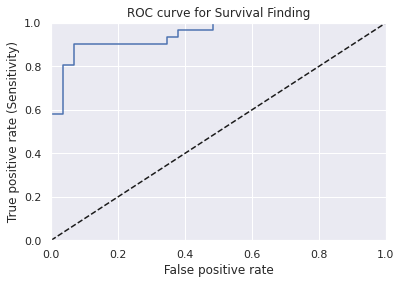

In [ ]:
y_predicted_probs_yes=lr.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9466073414905449

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(lr, X,y, cv=5)
print(score_lr)
print(" Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))

[0.83333333 0.88333333 0.86666667 0.86666667 0.75      ]
 Logistic Regression Accuracy: 0.84 (+/- 0.10)


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier ()
classifier_knn.fit (X_train, y_train)
y_pred_knn =classifier_knn.predict(X_test) #predict the X_test
acc_knn = accuracy_score (y_test, y_pred_knn)
print('Accuracy of KNeighborsClassifier: ',acc_knn)
cm_knn= confusion_matrix (y_test, y_pred_knn)
print('Confusion matrix KNeighborsClassifier: \n',cm_knn)
cr_knn = classification_report(y_test,y_pred_knn)
print('Classification report KNeighborsClassifier \n',cr_knn)
pr_knn = precision_score(y_test,y_pred_knn)
re_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

Accuracy of KNeighborsClassifier:  0.8666666666666667
Confusion matrix KNeighborsClassifier: 
 [[23  6]
 [ 2 29]]
Classification report KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.83      0.94      0.88        31

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



## ROC_AUC Curve

In [ ]:
y_predicted_probs = classifier_knn.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.8,0.2
1,1.0,0.0
2,0.2,0.8
3,0.0,1.0
4,0.4,0.6


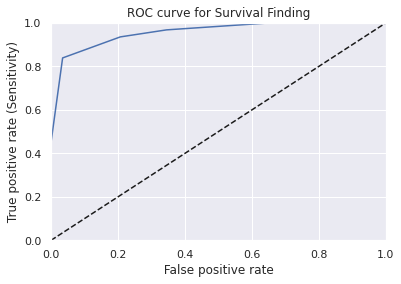

In [ ]:
y_predicted_probs_yes=classifier_knn.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9566184649610678

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_knn=cross_val_score(classifier_knn, X,y, cv=5)
print(score_knn)
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

[0.61666667 0.65       0.58333333 0.73333333 0.65      ]
 K-Nearest Neighbors Accuracy: 0.65 (+/- 0.10)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit (X_train, y_train)
Y_pred_dtc = classifier_dtc.predict (X_test)
acc_dtc = accuracy_score (y_test, Y_pred_dtc)
print('Accuracy of DecisionTreeClassifier: ',acc_dtc)
cm_dtc = confusion_matrix (y_test, Y_pred_dtc)
print('Confusion matrix DecisionTreeClassifier: \n',cm_dtc)
cr_dtc = classification_report(y_test,Y_pred_dtc)
print('Classification report DecisionTreeClassifier \n',cr_dtc)
pr_dtc = precision_score(y_test,Y_pred_dtc)
re_dtc = recall_score(y_test,Y_pred_dtc)
f1_dtc = f1_score(y_test,Y_pred_dtc)

Accuracy of DecisionTreeClassifier:  0.8
Confusion matrix DecisionTreeClassifier: 
 [[25  4]
 [ 8 23]]
Classification report DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.85      0.74      0.79        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



### ROC_AUC Curve

In [ ]:
y_predicted_probs = classifier_dtc.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


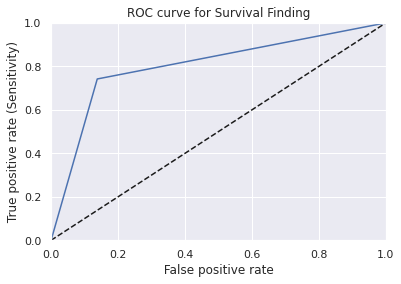

In [ ]:
y_predicted_probs_yes=classifier_dtc.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.8020022246941045

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(classifier_dtc, X,y, cv=10)
print(score_tree)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))

[0.7        0.8        0.86666667 0.76666667 0.76666667 0.76666667
 0.66666667 0.8        0.73333333 0.76666667]
Decision Tree Accuracy: 0.76 (+/- 0.11)


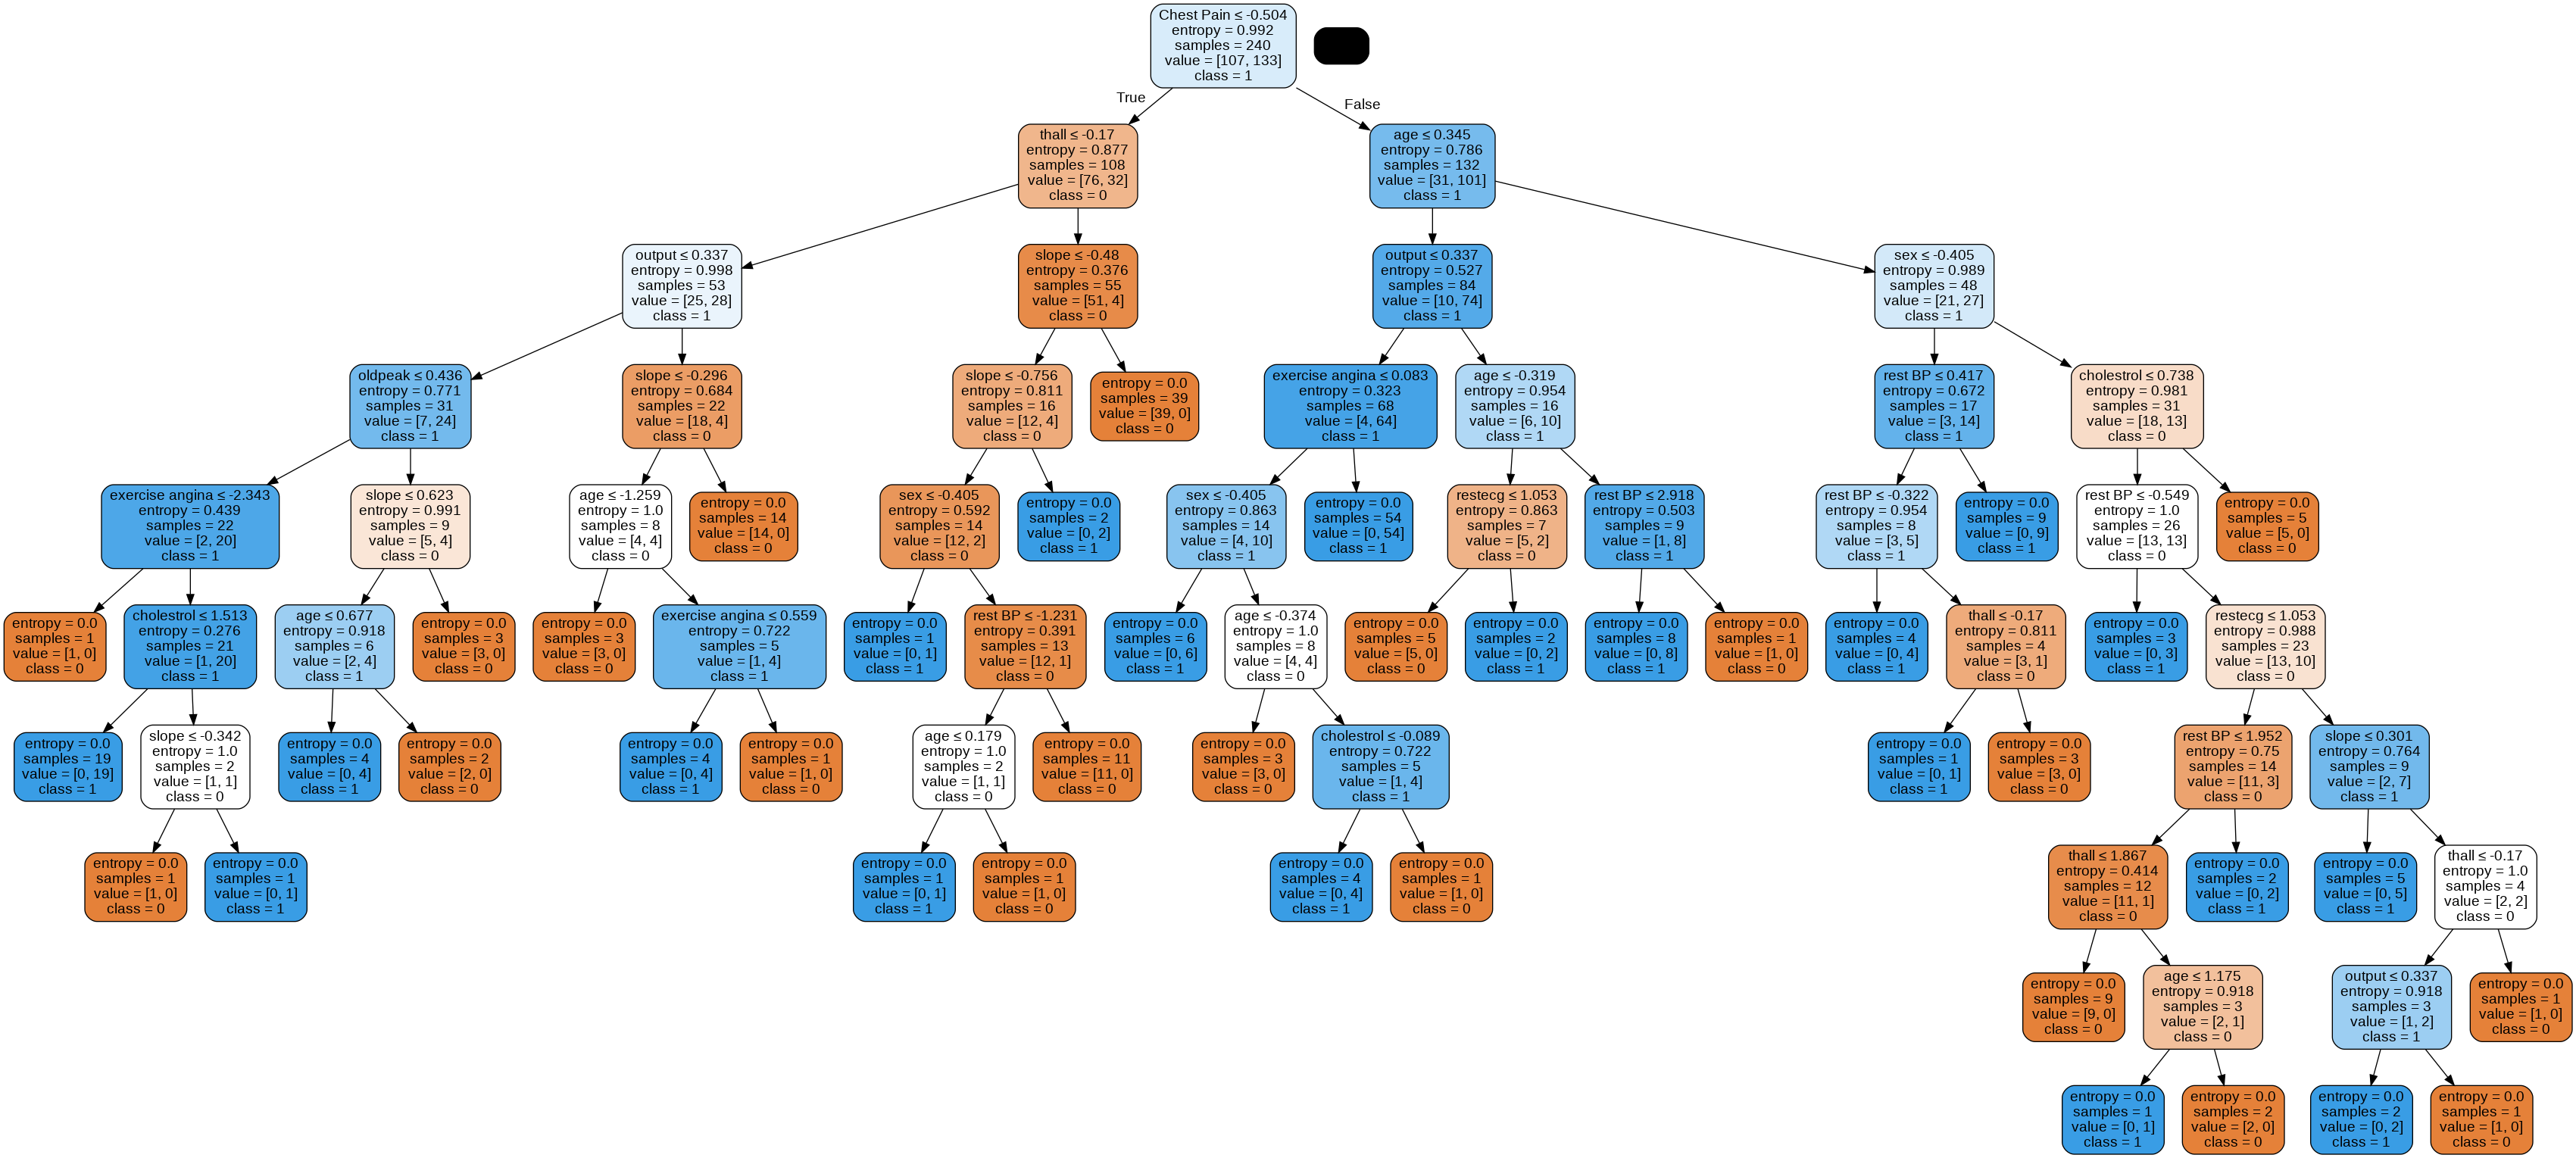

In [ ]:
feature_cols = ['age', 'sex', 'Chest Pain', 'rest BP', 'cholestrol', 'restecg','max heart rate', 'exercise angina', 'oldpeak', 'slope','Major vessels', 'thall', 'output']
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
import os # if its giving error while installing 'os' use below line of code)

os.environ["PATH"] += os.pathsep + 'C:/Users/admin/anaconda3/pkgs/Graphviz/bin'

export_graphviz(classifier_dtc, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
acc_naive = metrics.accuracy_score(y_pred2,y_test)
print('Accuracy of Naive Bayes= ',acc_naive)
cm_naive = confusion_matrix (y_test, y_pred2)
print('Confusion matrix Naive Bayes: \n',cm_naive)
cr_naive = classification_report(y_test,y_pred2)
print('Classification report Naive Bayes \n',cr_naive)
pr_naive = precision_score(y_test,y_pred2)
re_naive = recall_score(y_test,y_pred2)
f1_naive = f1_score(y_test,y_pred2)

Accuracy of Naive Bayes=  0.9166666666666666
Confusion matrix Naive Bayes: 
 [[27  2]
 [ 3 28]]
Classification report Naive Bayes 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.93      0.90      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



## ROC_AUC Curve

In [ ]:
y_predicted_probs = gnb.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.568030,0.431970
1,0.999542,0.000458
2,0.004146,0.995854
3,0.004921,0.995079
4,0.338749,0.661251


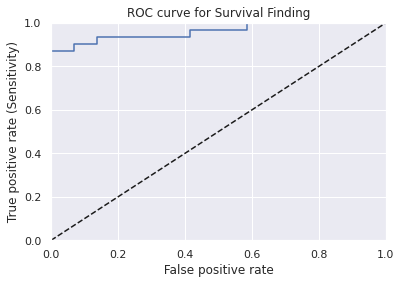

In [ ]:
y_predicted_probs_yes=gnb.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9610678531701892

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_naive=cross_val_score(gnb, X,y, cv=5)
print(score_naive)
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (score_naive.mean(), score_naive.std() * 2))

[0.8        0.88333333 0.76666667 0.85       0.71666667]
Naive Bayes Accuracy: 0.80 (+/- 0.12)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
acc_rf = accuracy_score(y_pred1,y_test)
print('Accuracy of RandomForestClassifier= ',acc_rf)
cm_rf = confusion_matrix (y_test, y_pred1)
print('Confusion matrix RandomForestClassifier: \n',cm_rf)
cr_rf = classification_report(y_test,y_pred1)
print('Classification report RandomForestClassifier \n',cr_rf)
pr_rf = precision_score(y_test,y_pred1)
re_rf = recall_score(y_test,y_pred1)
f1_rf = f1_score(y_test,y_pred1)

Accuracy of RandomForestClassifier=  0.9
Confusion matrix RandomForestClassifier: 
 [[27  2]
 [ 4 27]]
Classification report RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.87      0.90        31

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



## ROC_AUC Curve

In [ ]:
y_predicted_probs = rf.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.74,0.26
1,0.86,0.14
2,0.42,0.58
3,0.05,0.95
4,0.77,0.23


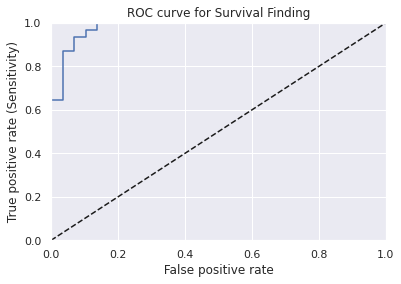

In [ ]:
y_predicted_probs_yes=rf.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9799777530589544

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(rf, X,y, cv=5)
print(score_rf)
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (score_rf.mean(), score_rf.std() * 2))

[0.83333333 0.86666667 0.83333333 0.76666667 0.76666667]
Naive Bayes Accuracy: 0.81 (+/- 0.08)


In [ ]:
dt1 = {'y_pred': y_pred1, 'y_test': y_test}
Rf_frame = pd.DataFrame(dt1)
Rf_frame.head()

,y_pred,y_test
205,0,0
269,0,0
153,1,1
9,1,1
236,0,0


In [ ]:
Rf_frame[Rf_frame['y_pred'] != Rf_frame['y_test']]

,y_pred,y_test
42,0,1
158,0,1
241,1,0
120,0,1
91,0,1
281,1,0


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_pred_svm,y_test)
print('Accuracy of Support Vector Machines: ',acc_svm)
cm_svm = confusion_matrix (y_test, y_pred_svm)
print('Confusion matrix Support Vector Machines: \n',cm_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print('Classification report Support Vector Machines: \n',cr_svm)
pr_svm = precision_score(y_test,y_pred_svm)
re_svm = recall_score(y_test,y_pred_svm)
f1_svm = f1_score(y_test,y_pred_svm)

Accuracy of Support Vector Machines:  0.8833333333333333
Confusion matrix Support Vector Machines: 
 [[25  4]
 [ 3 28]]
Classification report Support Vector Machines: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.90      0.89        31

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



##  Plotting Data

In [ ]:
def plot_data(col1,col2):
  figg = plt.figure(figsize=(15,8))
  plt.scatter(df[df['output']==0][col1],df[df['output']==0][col2],25,color='red',marker='*',edgecolor='black')
  plt.scatter(df[df['output']==1][col1],df[df['output']==1][col2],25,color='goldenrod',marker='o',edgecolor='black')
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

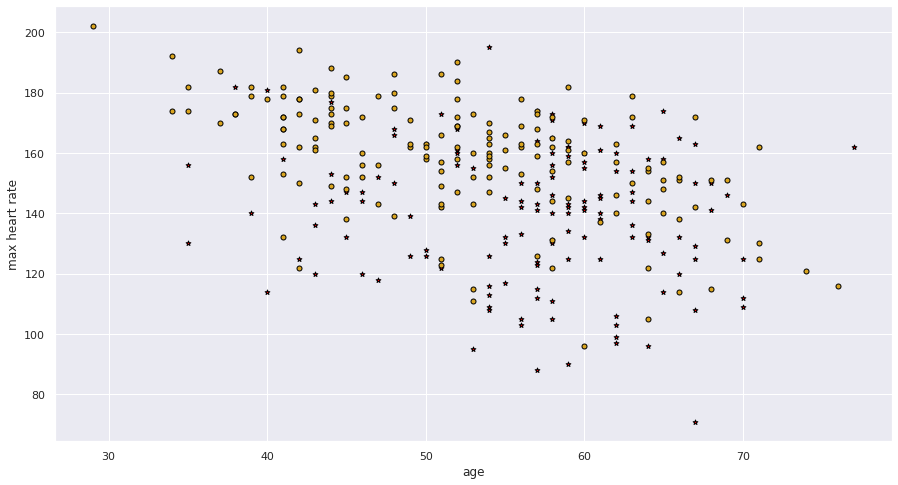

In [ ]:
plot_data('age','max heart rate')

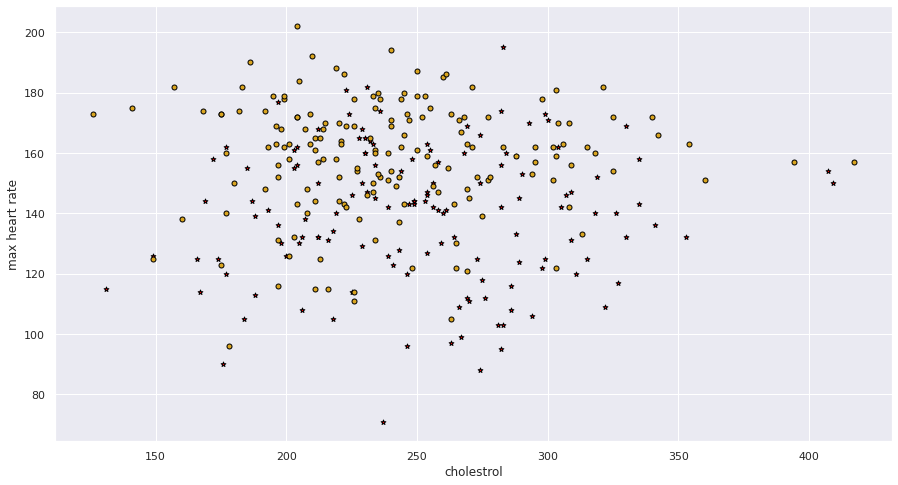

In [ ]:
plot_data('cholestrol','max heart rate')

In [ ]:
dt = {'y_pred': y_pred_svm, 'y_test': y_test}
SVM_frame = pd.DataFrame(dt)
SVM_frame.head()

,y_pred,y_test
205,0,0
269,0,0
153,1,1
9,1,1
236,0,0


In [ ]:
SVM_frame[SVM_frame['y_pred'] != SVM_frame['y_test']]

,y_pred,y_test
183,1,0
42,0,1
298,1,0
158,0,1
241,1,0
120,0,1
281,1,0


# Model Evaluation

# Results to a DataFrame

In [ ]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "DECISION TREE", "NAIVE BAYES",'RANDOM FOREST','SUPPORT VECTOR MACHINES'],
"ACCURACY SCORE " : [acc_lr, acc_knn, acc_dtc,acc_naive,acc_rf,acc_svm],
          "CONFUSION MATRIX" :[cm_lr, cm_knn, cm_dtc, cm_naive,cm_rf,cm_svm],
             "PRECISION SCORE" :[pr_lr, pr_knn, pr_dtc, pr_naive,pr_rf,pr_svm],
           'F1_SCORE':[f1_lr,f1_knn,f1_dtc,f1_naive,f1_rf,f1_svm]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,CONFUSION MATRIX,PRECISION SCORE,F1_SCORE
0,LOGISTIC REGRESSION,0.883333,"[[25, 4], [3, 28]]",0.875000,0.888889
1,K-NN,0.866667,"[[23, 6], [2, 29]]",0.828571,0.878788
2,DECISION TREE,0.800000,"[[25, 4], [8, 23]]",0.851852,0.793103
3,NAIVE BAYES,0.916667,"[[27, 2], [3, 28]]",0.933333,0.918033
4,RANDOM FOREST,0.900000,"[[27, 2], [4, 27]]",0.931034,0.900000
5,SUPPORT VECTOR MACHINES,0.883333,"[[25, 4], [3, 28]]",0.875000,0.888889


Statistical Summary

In [ ]:
import statsmodels.api as sm       #stats models to give the statistical summary

X = sm.add_constant(X)                #constant is added to the framed equation of the model
reg_fit = sm.Logit(y,X)                   #Logit function is used to process the regression
results = reg_fit.fit()                       #Fitting the data
results.summary()

Optimization terminated successfully.
         Current function value: 0.350710
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  300
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           13
Date:                Wed, 28 Sep 2022   Pseudo R-squ.:                  0.4908
Time:                        16:31:15   Log-Likelihood:                -105.21
converged:                       True   LL-Null:                       -206.64
Covariance Type:            nonrobust   LLR p-value:                 3.558e-36
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.7927      2.600      1.458      0.145      -1.304       8.890
age                    -0.0060      0.023     -0.256      0.798      -0.052       0.040
sex                    -1.7575      0.469     -3.749      0.000      -2.676      -0.839
Chest Pain              0.8443      0.186      4.544      0.000       0.480       1.208
rest BP                -0.0182      0.010     -1.743      0.081      -0.039       0.002
cholestrol             -0.0063      0.004     -1.471      0.141      -0.015       0.002
fasting blood sugar     0.0482      0.530      0.091      0.927      -0.990       1.086
restecg                 0.4640      0.348      1.333      0.182      -0.218       1.146
max heart rate          0.0231      0.010      2.209      0.027       0.003       0.044
exercise angina        -0.9708      0.410     -2.366      0.018      -1.775      -0.166
oldpeak                -0.5451      0.215     -2.539      0.011      -0.966      -0.124
slope                   0.5877      0.349      1.684      0.092      -0.096       1.272
Major vessels          -0.7723      0.192     -4.020      0.000      -1.149      -0.396
thall                  -0.9150      0.291     -3.139      0.002      -1.486      -0.344
=======================================================================================
"""

**Interpretation of the Summary**:
- Dependent variable is given. Observation count is 300 which is known equal to no of rows.
- Logit model is used as its a logistic Regression.
- Df Residuals, degrees of freedom are 287, n-k-1, n=300,k=12.
- Method chosen is Maximum likelihood estimation, which means that estimation or the probability that the extend to which the data supports the different values of the parameter. It uses a hypothesis that one estimation is higher than the other and concludes accordingly.
- Log likelihood: Its the logarithm of the likelihood, which means the distribution to support the estimation calculated with the statistical parameters related to the features.
- We can see the coefficient for the equation in the equation, standard error, p-value, statistical test value, quartile values with 2.5% on either side. This is the complete work in the descriptive statistics.

Odds Ratio and p-value

In [ ]:
params = np.exp(results.params) 
conf = np.exp(results.conf_int())
conf['OR'] = params #Odds ratio 
pvalue=round(results.pvalues,3) #rounding the values
conf['pvalue']=pvalue #Pvalue
conf.columns = ['CI 95%', 'CI 95%', 'Odds Ratio','pvalue']
conf.head()

,CI 95%,CI 95%,Odds Ratio,pvalue
const,0.271399,7255.961080,44.376316,0.145
age,0.949772,1.040415,0.994061,0.798
sex,0.068810,0.432280,0.172468,0.000
Chest Pain,1.616324,3.348352,2.326375,0.000
rest BP,0.962100,1.002266,0.981978,0.081


# GridSearchCV

In [ ]:
model = LogisticRegression()
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

def best_model_using_GridSearchCV(X,y):
  algorithms = {
      'logistic_regression':{
            'model' : LogisticRegression(solver = 'liblinear',multi_class='auto'),
            'params' : {
                'C' : [0.1,0.5,1]
            }
        },
      'SVM' : {
          'model' : SVC(gamma = 'auto'),
          'params' : {
              'C' : [1,2,3],
              'kernel' : ['rbf','linear','sigmoid','poly']    
          }
      },
       'random_forest':{
            'model' : RandomForestClassifier(),
            'params':{
                'n_estimators':[1,5]
            }
       },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
  }

  scores = []
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

  for algorithm_name, configuration in algorithms.items():
      gs = GridSearchCV(configuration['model'], configuration['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model' : algorithm_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
  })
      return pd.DataFrame(scores, columns=['model','best_score','best_params'])
      
      
best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,logistic_regression,0.876667,{'C': 0.5}


Hyperparameter Tuning

# Deep Learning Models

## Artificial Neural Networks

In [ ]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
#Initialise the ANN
classifier = Sequential()
#Adding input layer
classifier.add(Dense(units=16,kernel_initializer = 'uniform',activation='relu',input_dim = 13))
#Adding hidden layer
classifier.add(Dense(units=12,kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dropout(0.25))
#Adding another hidden layer
classifier.add(Dense(units=8,kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dropout(0.25))
#Adding another hidden layer
classifier.add(Dense(units=4,kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dropout(0.25))
#Output layer
classifier.add(Dense(1,kernel_initializer = 'uniform',activation='sigmoid'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  #value loss function is considered to iterate
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=20,   #No of epochs to wait before stopping
    verbose=1,  #display the summary
    mode='auto',  
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
16/16 [==============================] - 4s 15ms/step - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6905 - val_accuracy: 0.5375
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5625 - val_loss: 0.6372 - val_accuracy: 0.5375
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.5625 - val_loss: 0.5882 - val_accuracy: 0.5375
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5403 - accuracy: 0.6687 - val_loss: 0.5475 - val_accuracy: 0.7875
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.8250 - val_loss: 0.5358 - val_accuracy: 0.7875
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5146 - accuracy: 0.7750 - val_loss: 0.5346 - val_accuracy: 0.7875
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.8375 - val_loss: 0.5946 - val_accuracy: 0.8000
Epoch

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

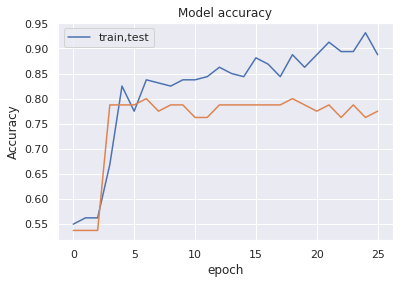

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train,test'],loc='upper left')
plt.show()

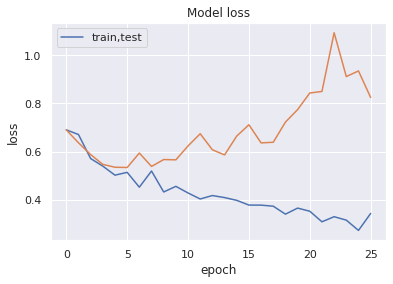

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train,test'],loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[23,  6],
       [ 6, 25]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8

In [ ]:
# classifier.get_weights()

# LSTM RNN

In [ ]:
from keras.layers import Dense, LSTM

In [ ]:
df.shape

(300, 13)

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X = [[X.iloc[j][i] for i in range(12)] for j in range(300)]
y = [y.iloc[k] for k in range(300)]

X = np.array(X,dtype=float)
y = np.array(y,dtype=float)
X = X.reshape((300,12,1))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape,X_test.shape)

(240, 12, 1) (60, 12, 1)


In [ ]:
model = Sequential()
model.add(LSTM((1),batch_input_shape=(None,12,1),activation='relu',return_sequences=True))
model.add(LSTM((1),activation='relu',return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 1)             12        
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
8/8 [==============================] - 3s 91ms/step - loss: 0.6911 - accuracy: 0.5292 - val_loss: 0.6884 - val_accuracy: 0.5500
Epoch 2/200
8/8 [==============================] - 0s 46ms/step - loss: 0.6895 - accuracy: 0.5458 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 3/200
8/8 [==============================] - 0s 48ms/step - loss: 0.6898 - accuracy: 0.5458 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 4/200
8/8 [==============================] - 0s 46ms/step - loss: 0.6893 - accuracy: 0.5458 - val_loss: 0.6882 - val_accuracy: 0.5500
Epoch 5/200
8/8 [==============================] - 0s 45ms/step - loss: 0.6892 - accuracy: 0.5458 - val_loss: 0.6881 - val_accuracy: 0.5500
Epoch 6/200
8/8 [==============================] - 0s 46ms/step - loss: 0.6891 - accuracy: 0.5458 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 7/200
8/8 [==============================] - 0s 46ms/step - loss: 0.6893 - accuracy: 0.5458 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 8/200
8/8 [===

In [ ]:
results = model.predict(X_test)

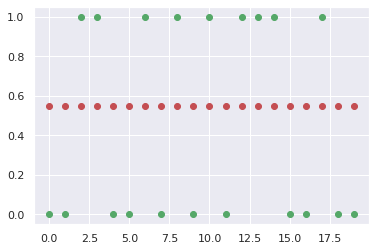

In [ ]:
plt.scatter(range(20),results[:20],c='r')
plt.scatter(range(20),y_test[:20],c='g')
plt.show()

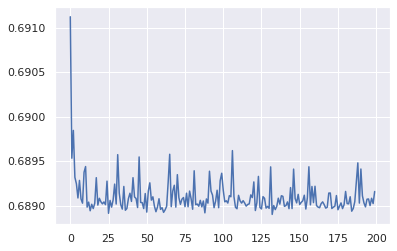

In [ ]:
plt.plot(history.history['loss'])
plt.show()

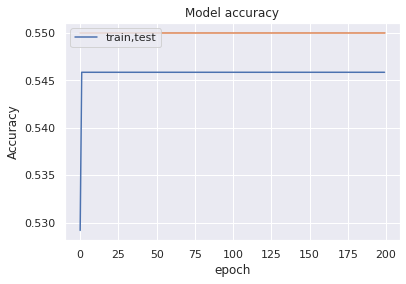

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train,test'],loc='upper left')
plt.show()

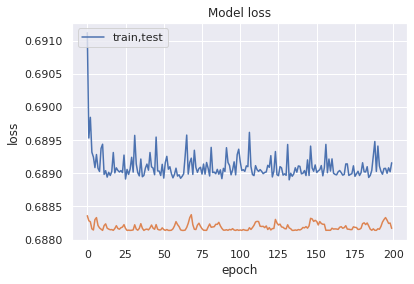

In [ ]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train,test'],loc='upper left')
plt.show()

In [ ]:
results = (results>=0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,results)
print(cm)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,results)

[[ 0 27]
 [ 0 33]]


0.55

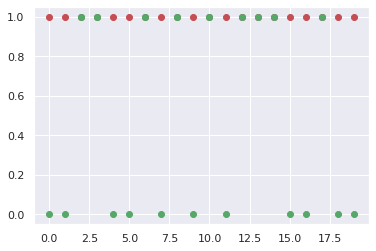

In [ ]:
plt.scatter(range(20),results[:20],c='r')
plt.scatter(range(20),y_test[:20],c='g')
plt.show()

-----------------------------------------------------------------------------THANK YOU--------------------------------------------------------------------------